<a href="https://colab.research.google.com/github/EnhanceImpact/income-classifier-app/blob/main/ACS_Data_EDA_Notebook%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Description: PUMS 1-Year Data (U.S. Census Bureau)**

#### The PUMS (Public Use Microdata Sample) dataset is a rich, person-level sample of responses collected by the U.S. Census Bureau through the American Community Survey (ACS).

#### It provides anonymized individual-level data that allows researchers and analysts to explore demographic, social, economic, and housing characteristics of the U.S. population.

#### This dataset is derived from a one-year sample, meaning it reflects the population characteristics of a single calendar year.

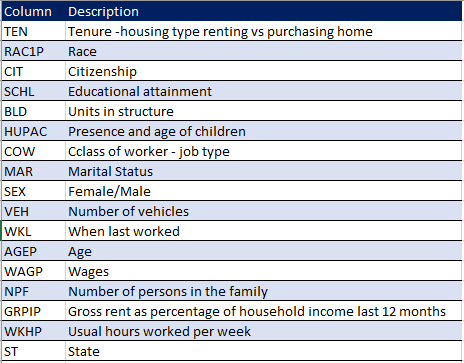

# Step 1: Load the Data

In [1]:
import pandas as pd

# Replace with the path to your uploaded file
df = pd.read_csv("/content/ACSPUMS1Y2022_Georgia_Data.csv")
df.head()


,TEN,RAC1P,CIT,SCHL,BLD,HUPAC,COW,MAR,SEX,VEH,WKL,AGEP,WAGP,NPF,GRPIP,WKHP,ST
0,0,2,1,12,0,0,0,1,1,-1,3,48,0,1,0,0,13
1,0,1,1,18,0,0,0,5,1,-1,3,19,0,1,0,0,13
2,0,2,1,17,0,0,0,1,1,-1,3,36,0,1,0,0,13
3,0,2,1,17,0,0,4,5,1,-1,1,27,31300,1,0,48,13
4,0,1,1,22,0,0,0,3,1,-1,3,92,0,1,0,0,13


In [2]:
# Number of rows and columns
df.shape

(109349, 17)

# Step 2: Map Numeric Codes to Readable Categories

In [3]:
# =======================
# 1. Define Mapping Dictionaries
# =======================

marital_status_map = {
    1: "Married",
    2: "Widowed",
    3: "Divorced",
    4: "Separated",
    5: "Never married"
}

citizenship_map = {
    1: "Born in US",
    2: "Born in Territory",
    3: "Born abroad to US parents",
    4: "Naturalized",
    5: "Not a citizen"
}

class_of_worker_map = {
    0: "Not Applicable",
    1: "Private for-profit",
    2: "Private nonprofit",
    3: "Local government",
    4: "State government",
    5: "Self-employed"
}

sex_map = {
    1: "Male",
    2: "Female"
}

# Remap the education feature to reduce the dimensionality and sparse matrix issues that can occur for XGBOOST
# education_map = {
#     0: "N/A",
#     1: "No schooling",
#     2: "Nursery/Preschool",
#     3: "Kindergarten",
#     4: "Grade 1",
#     5: "Grade 2",
#     6: "Grade 3",
#     7: "Grade 4",
#     8: "Grade 5",
#     9: "Grade 6",
#     10: "Grade 7",
#     11: "Grade 8",
#     12: "Grade 9",
#     13: "Grade 10",
#     14: "Grade 11",
#     15: "12th grade, no diploma",
#     16: "HS diploma",
#     17: "GED",
#     18: "Some college <1yr",
#     19: "Some college >1yr",
#     20: "Associate's",
#     21: "Bachelor's",
#     22: "Master's",
#     23: "Professional degree"
# }

education_map = {
    0: "N/A",
    1: "No schooling",
    2: "Pre-K to Grade 4",
    3: "Pre-K to Grade 4",
    4: "Pre-K to Grade 4",
    5: "Pre-K to Grade 4",
    6: "Pre-K to Grade 4",
    7: "Pre-K to Grade 4",
    8: "Grade 5-8",
    9: "Grade 5-8",
    10: "Grade 5-8",
    11: "Grade 5-8",
    12: "Grade 9-12 (no diploma)",
    13: "Grade 9-12 (no diploma)",
    14: "Grade 9-12 (no diploma)",
    15: "Grade 9-12 (no diploma)",
    16: "High School Graduate",
    17: "High School Graduate",
    18: "Some College",
    19: "Some College",
    20: "Associate's",
    21: "Bachelor's",
    22: "Graduate Degree",
    23: "Graduate Degree"
}

race_map = {
    1: "White",
    2: "Black",
    3: "American Indian",
    4: "Alaska Native",
    5: "Tribes Specified",
    6: "Asian",
    7: "Pacific Islander",
    8: "Other",
    9: "Two or More Races"
}

tenure_map = {
0: "N/A",
1: "Owned with mortgage or loan (include home equity loans)",
2: "Owned Free And Clear",
3: "Rented",
4: "Occupied without payment of rent"
}

building_map = {
0: "N/A",
1: "Mobile Home or Trailer",
2: "One-family house detached",
3: "One-family house attached",
4: "2 Apartments",
5: "3-4 Apartments",
6: "5-9 Apartments",
7: "10-19 Apartments",
8: "20-49 Apartments",
9: "50 or More Apartments",
10: "Boat, RV, van, etc."
}

children_map = {
0: "N/A",
1: "With children under 6 years only",
2: "With children 6 to 17 years only",
3: "With children under 6 years and 6 to 17 years",
4: "No children"
}

vehicle_map = {
-1: "N/A",
0: "No vehicles",
1: "1 vehicle",
2: "2 vehicles",
3: "3 vehicles",
4: "4 vehicles",
5: "5 vehicles",
6: "6 or more vehicles"
}


# =======================
# 2. Apply the Mapping
# =======================

df["MAR"] = df["MAR"].map(marital_status_map)
df["CIT"] = df["CIT"].map(citizenship_map)
df["COW"] = df["COW"].map(class_of_worker_map)
df["SEX"] = df["SEX"].map(sex_map)
df["SCHL"] = df["SCHL"].map(education_map)
df["RAC1P"] = df["RAC1P"].map(race_map)
df["TEN"] = df["TEN"].map(tenure_map)
df["BLD"] = df["BLD"].map(building_map)
df["HUPAC"] = df["HUPAC"].map(children_map)
df["VEH"] = df["VEH"].map(vehicle_map)

# View the first five rows
df.head()

,TEN,RAC1P,CIT,SCHL,BLD,HUPAC,COW,MAR,SEX,VEH,WKL,AGEP,WAGP,NPF,GRPIP,WKHP,ST
0,N/A,Black,Born in US,Grade 9-12 (no diploma),N/A,N/A,Not Applicable,Married,Male,N/A,3,48,0,1,0,0,13
1,N/A,White,Born in US,Some College,N/A,N/A,Not Applicable,Never married,Male,N/A,3,19,0,1,0,0,13
2,N/A,Black,Born in US,High School Graduate,N/A,N/A,Not Applicable,Married,Male,N/A,3,36,0,1,0,0,13
3,N/A,Black,Born in US,High School Graduate,N/A,N/A,State government,Never married,Male,N/A,1,27,31300,1,0,48,13
4,N/A,White,Born in US,Graduate Degree,N/A,N/A,Not Applicable,Divorced,Male,N/A,3,92,0,1,0,0,13


In [4]:
#@title Step 3: Inspect Raw Data
print(df.info())
print(df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())
print(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109349 entries, 0 to 109348
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   TEN     109349 non-null  object
 1   RAC1P   109349 non-null  object
 2   CIT     109349 non-null  object
 3   SCHL    107898 non-null  object
 4   BLD     109349 non-null  object
 5   HUPAC   109349 non-null  object
 6   COW     101673 non-null  object
 7   MAR     109349 non-null  object
 8   SEX     109349 non-null  object
 9   VEH     109349 non-null  object
 10  WKL     109349 non-null  int64 
 11  AGEP    109349 non-null  int64 
 12  WAGP    109349 non-null  int64 
 13  NPF     109349 non-null  int64 
 14  GRPIP   109349 non-null  int64 
 15  WKHP    109349 non-null  int64 
 16  ST      109349 non-null  int64 
dtypes: int64(7), object(10)
memory usage: 14.2+ MB
None
TEN         0
RAC1P       0
CIT         0
SCHL     1451
BLD         0
HUPAC       0
COW      7676
MAR         0
SEX         0
VEH

# Step 5: Create Income Category (`<=50K`, `>50K`)

In [5]:
import numpy as np

df["income"] = np.where(df["WAGP"] > 50000, ">50K", "<=50K")
df["income"].value_counts()

# View the first five rows
df.head()

,TEN,RAC1P,CIT,SCHL,BLD,HUPAC,COW,MAR,SEX,VEH,WKL,AGEP,WAGP,NPF,GRPIP,WKHP,ST,income
0,N/A,Black,Born in US,Grade 9-12 (no diploma),N/A,N/A,Not Applicable,Married,Male,N/A,3,48,0,1,0,0,13,<=50K
1,N/A,White,Born in US,Some College,N/A,N/A,Not Applicable,Never married,Male,N/A,3,19,0,1,0,0,13,<=50K
2,N/A,Black,Born in US,High School Graduate,N/A,N/A,Not Applicable,Married,Male,N/A,3,36,0,1,0,0,13,<=50K
3,N/A,Black,Born in US,High School Graduate,N/A,N/A,State government,Never married,Male,N/A,1,27,31300,1,0,48,13,<=50K
4,N/A,White,Born in US,Graduate Degree,N/A,N/A,Not Applicable,Divorced,Male,N/A,3,92,0,1,0,0,13,<=50K


# Step 4: Drop Duplicates, Fiter the Data Remove People Under 18 & People Who are Not Working

In [11]:
# Step 1: Filter rows based on conditions
df_filtered = df[
    (df["AGEP"] >= 16) &  # Age 16 and above
    (df["WKHP"] > 0) &    # Working positive hours
    (df["COW"].notna()) & # Has a job category
    (df["WAGP"] > 0)      # Has a positive wage
]

# Step 2: Drop the 'ST' and 'WAG' columns
df_filtered = df_filtered.drop(["ST","WAGP"], axis=1)

# Step 3: Drop duplicates
df_filtered = df_filtered.drop_duplicates()

print(df_filtered.head())
print(df_filtered.info())
print(df_filtered.isnull().sum())
print("\nDuplicate rows:", df_filtered.duplicated().sum())
print(df_filtered.shape)

    TEN             RAC1P            CIT                     SCHL  BLD HUPAC  \
3   N/A             Black     Born in US     High School Graduate  N/A   N/A   
6   N/A             White     Born in US             Some College  N/A   N/A   
10  N/A             White     Born in US             Some College  N/A   N/A   
17  N/A             Asian    Naturalized     High School Graduate  N/A   N/A   
18  N/A  Tribes Specified  Not a citizen  Grade 9-12 (no diploma)  N/A   N/A   

                  COW            MAR     SEX  VEH  WKL  AGEP  NPF  GRPIP  \
3    State government  Never married    Male  N/A    1    27    1      0   
6       Self-employed  Never married  Female  N/A    1    19    1      0   
10   State government  Never married  Female  N/A    1    21    1      0   
17      Self-employed  Never married    Male  N/A    1    25    1      0   
18  Private nonprofit        Married    Male  N/A    1    47    1      0   

    WKHP income  
3     48  <=50K  
6     50  <=50K  
10     8

# Step 5: Impute Missing Values

In [14]:
# Impute SCHL based on group mode
df_filtered.loc[:, "SCHL"] = df_filtered.groupby(
    ["COW", "AGEP", "MAR"]
)["SCHL"].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x.fillna("Unknown")
)

print(df_filtered.isnull().sum())

TEN       0
RAC1P     0
CIT       0
SCHL      0
BLD       0
HUPAC     0
COW       0
MAR       0
SEX       0
VEH       0
WKL       0
AGEP      0
NPF       0
GRPIP     0
WKHP      0
income    0
dtype: int64


# Step 6: Summary Stats

In [15]:
# View summary statistics after removing minors
df_filtered.describe(include="all")

,TEN,RAC1P,CIT,SCHL,BLD,HUPAC,COW,MAR,SEX,VEH,WKL,AGEP,NPF,GRPIP,WKHP,income
count,46767,46767,46767,46767,46767,46767,46767,46767,46767,46767,46767.0,46767.000000,46767.000000,46767.000000,46767.000000,46767
unique,5,9,5,10,11,5,5,5,2,8,NaN,NaN,NaN,NaN,NaN,2
top,Owned with mortgage or loan (include home equi...,White,Born in US,High School Graduate,One-family house detached,No children,Private for-profit,Married,Male,2 vehicles,NaN,NaN,NaN,NaN,NaN,<=50K
freq,24013,27633,39833,11265,34519,27566,34374,24424,23462,18734,NaN,NaN,NaN,NaN,NaN,28422
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,42.523083,2.864263,7.809973,38.959074,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,15.069750,1.560772,18.060446,12.487417,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.000000,1.000000,0.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30.000000,2.000000,0.000000,38.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,42.000000,3.000000,0.000000,40.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,54.000000,4.000000,0.000000,42.000000,NaN


In [16]:
print(df_filtered.head())
print(df_filtered.info())
print(df_filtered.isnull().sum())
print("\nDuplicate rows:", df_filtered.duplicated().sum())
print(df_filtered.shape)

    TEN             RAC1P            CIT                     SCHL  BLD HUPAC  \
3   N/A             Black     Born in US     High School Graduate  N/A   N/A   
6   N/A             White     Born in US             Some College  N/A   N/A   
10  N/A             White     Born in US             Some College  N/A   N/A   
17  N/A             Asian    Naturalized     High School Graduate  N/A   N/A   
18  N/A  Tribes Specified  Not a citizen  Grade 9-12 (no diploma)  N/A   N/A   

                  COW            MAR     SEX  VEH  WKL  AGEP  NPF  GRPIP  \
3    State government  Never married    Male  N/A    1    27    1      0   
6       Self-employed  Never married  Female  N/A    1    19    1      0   
10   State government  Never married  Female  N/A    1    21    1      0   
17      Self-employed  Never married    Male  N/A    1    25    1      0   
18  Private nonprofit        Married    Male  N/A    1    47    1      0   

    WKHP income  
3     48  <=50K  
6     50  <=50K  
10     8

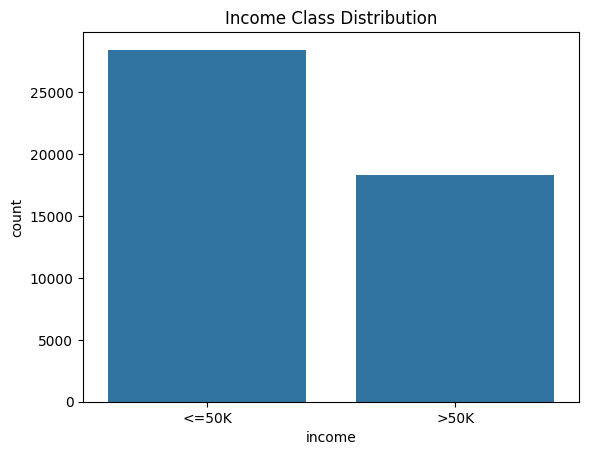

Income Class Counts income
<=50K    0.607736
>50K     0.392264
Name: count, dtype: float64


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class imbalance
sns.countplot(data=df_filtered, x='income')
plt.title('Income Class Distribution')
plt.show()

print('Income Class Counts', (df_filtered['income'].value_counts()/df_filtered.shape[0]))

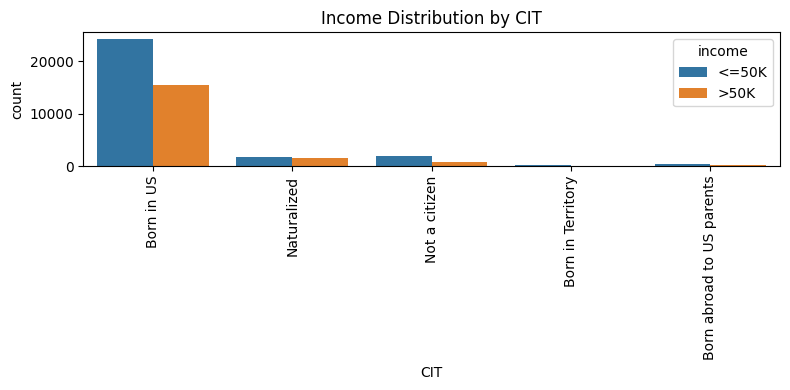

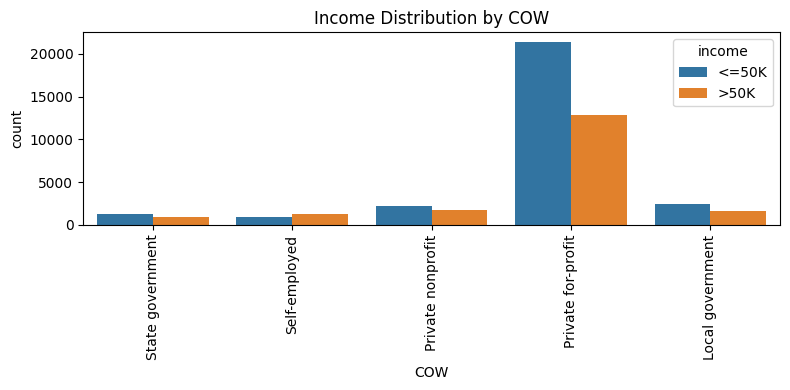

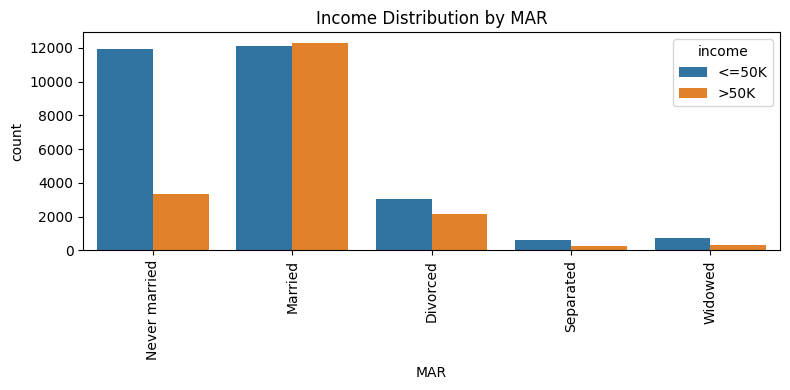

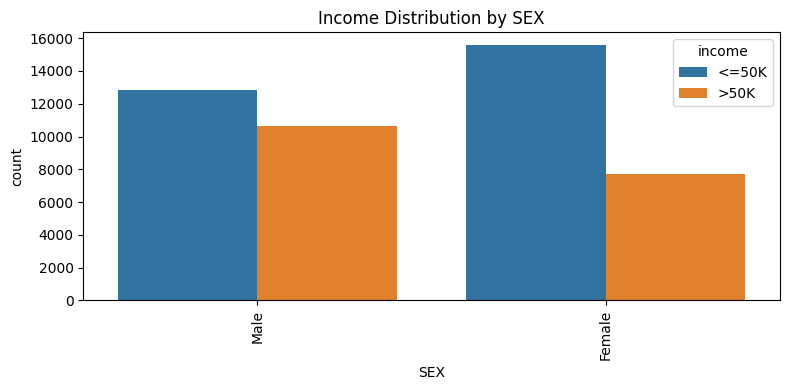

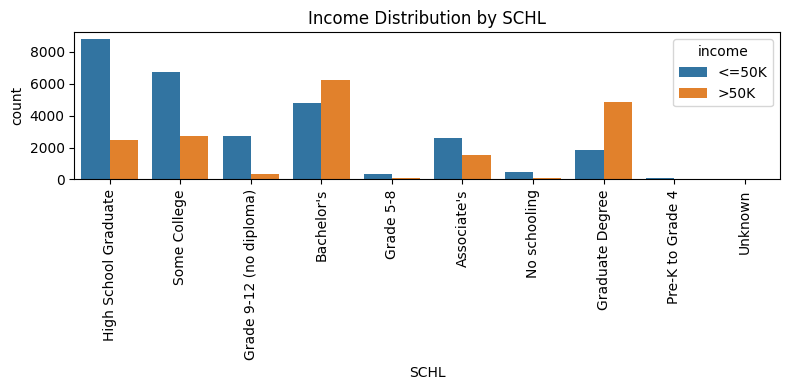

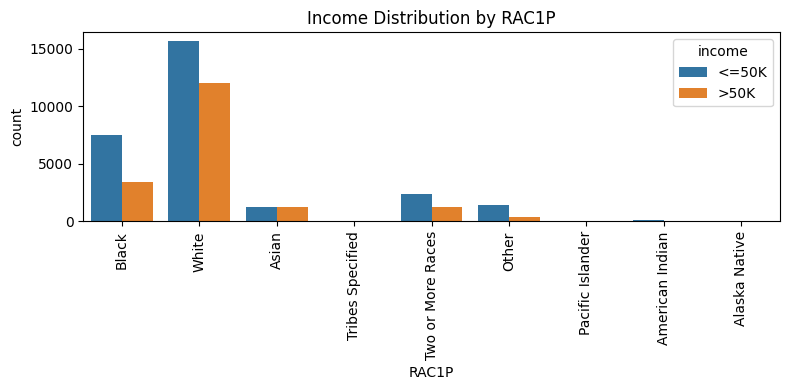

In [19]:
#@title Visualize the count of income levels within categories.
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = ['CIT','COW','MAR','SEX','SCHL','RAC1P']
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_filtered, x=var, hue='income')
    plt.title(f'Income Distribution by {var}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


##Crosstab + Chi-Square Test of Independence
A p-value < 0.05 suggests a statistically significant relationship between the variable and income.

In [20]:
#@title To statistically test if there’s an association between the categorical variable and income.
import scipy.stats as stats

for var in categorical_vars:
    table = pd.crosstab(df_filtered[var], df_filtered['income'])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    print(f'{var}: p-value = {p:.4f}')


CIT: p-value = 0.0000
COW: p-value = 0.0000
MAR: p-value = 0.0000
SEX: p-value = 0.0000
SCHL: p-value = 0.0000
RAC1P: p-value = 0.0000


# Export Cleaned Dataframe

In [21]:
df_filtered.to_csv("ACSPUMS1Y2022_Georgia_Data_clean.csv", index=False)